# 📊 Análise Exploratória de Dados (EDA) - Netflix Daily Top 10

## 🎯 Objetivo
Este projeto tem como objetivo realizar uma **Análise Exploratória de Dados (EDA)** na base `netflix_daily_top_10.csv`, identificando padrões, verificando a qualidade dos dados e extraindo insights.

## 🗂️ Escopo da Análise
A análise será focada nos seguintes aspectos:
- **Tipos de dados disponíveis** 📌
- **Período da análise feita** 📆
- **Tamanho da base de dados** 🔍
- **Verificação de valores nulos** ⚠️
- **Identificação de outliers** 📈

## 📁 Fonte dos Dados
Os dados utilizados neste projeto foram fornecidos pela **Rocketseat** e podem ser acessados no seguinte link:
🔗 [Download do dataset](https://efficient-sloth-d85.notion.site/Desafio-EDA-c8c8b2faf153449193b4b9fb0895afa6)

## 🛠️ Tecnologias Utilizadas
- **Python** 🐍
- **Pandas** 🏷️
- **Matplotlib e Seaborn** 📊
- **Jupyter Notebook** 📝

## 🚀 Vamos começar!

In [54]:
# Importação das bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Carregamento dos dados
df = pd.read_csv('..\data\daily_top_10_netflix .csv')

In [8]:
# Exibição das 5 primeiras linhas
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [9]:
# Verificação da quantidade de linhas e colunas
df.shape

(7100, 10)

### Pergunta 1: tipos de dados disponíveis

In [10]:
# Verificação dos tipos de dados
df.dtypes

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

### Pergunta 2: período da análise feita

In [35]:
# Conversão da coluna "Netflix Release Date" para o tipo datetime
df['As of'] = pd.to_datetime(df['As of'])

In [36]:
# Verificação dos tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        3132 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB


In [38]:
# Verificação do mínimo e máximo da coluna "Netflix Release Date"	
df['As of'].min(), df['As of'].max()

(Timestamp('2020-04-01 00:00:00'), Timestamp('2022-03-11 00:00:00'))

> Para entender o intervalo de tempo coberto pelos dados, analisei os valores mínimo e máximo da coluna **"As of"**.  
> - **Data mínima:** `1º de abril de 2020`  
> - **Data máxima:** `11 de março de 2022`  

### Pergunta 3: tamanho da base de dados

In [17]:
# Verificação do número de linhas e colunas
df.shape

(7100, 10)

> A base de dados possui um total de **7.100 linhas** e **10 colunas**.

### Pergunta 4: verificar dados nulos

In [18]:
# Verificação da quantidade de valores ausentes
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [19]:
# Verificação dos valores únicos da coluna "Last Week Rank"
df['Last Week Rank'].unique()

array(['1', '-', '2', '4', '5', '3', '8', '9', '6', '7', '10'],
      dtype=object)

> A coluna **"Last Week Rank"** não possui valores nulos explícitos, mas apresenta o símbolo **"-"**, que pode indicar ausência de informação.  
>  
> Para garantir uma análise precisa, é recomendado transformar **"-"** e eventuais valores `NaN` em um formato adequado, como **NaN do pandas** (`pd.NA`) ou um valor numérico coerente (ex.: `0` para indicar que o título não estava no ranking na semana anterior).

In [20]:
# Transformação do "-" em NaN na coluna "Last Week Rank"
df['Last Week Rank'] = df['Last Week Rank'].replace('-', pd.NA)

In [21]:
# Verificação dos valores ausentes depois da transformação
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank          3968
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

### Pergunta 5: outliers

In [23]:
# Visualização de estatísticas descritivas
df.describe()

,Rank,Netflix Release Date,Days In Top 10,Viewership Score
count,7100.000000,7100,7100.000000,7100.000000
mean,5.500000,2020-06-21 08:05:32.619718144,24.123662,122.790141
min,1.000000,2007-01-15 00:00:00,1.000000,1.000000
25%,3.000000,2020-04-26 00:00:00,3.000000,19.000000
50%,5.500000,2020-10-02 00:00:00,7.000000,50.000000
75%,8.000000,2021-05-14 00:00:00,18.000000,128.000000
max,10.000000,2022-03-04 00:00:00,428.000000,1474.000000
std,2.872484,NaN,58.473789,213.861642


#### Coluna "Viewership Score"

<Axes: >

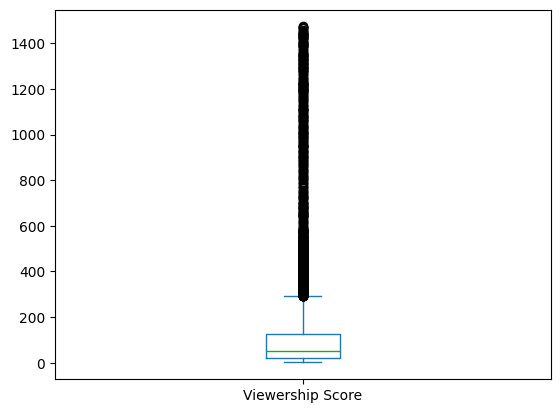

In [25]:
# Identificação de outliers da coluna "Viewership Score"
df['Viewership Score'].plot(kind='box')

In [26]:
# Filtragem dos outliers pelo intervalo interquartil
q1 = df['Viewership Score'].quantile(0.25)
q3 = df['Viewership Score'].quantile(0.75)

# Cálculo do intervalo interquartil
iqr = q3 - q1

In [27]:
# Definição dos limites inferior e superior
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [30]:
# Filtragem dos outliers
df_outliers = df[(df['Viewership Score'] < lower_bound) | (df['Viewership Score'] > upper_bound)]
df_outliers

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
236,2020-04-24,7,7,2,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,32,292
247,2020-04-25,8,7,2,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,33,295
255,2020-04-26,6,8,3,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,34,300
269,2020-04-27,10,6,4,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,35,301
2382,2020-11-25,3,2,3,The Queenâs Gambit,TV Show,Yes,2020-10-23,33,296
...,...,...,...,...,...,...,...,...,...,...
7008,2022-03-02,9,6,3,Sweet Magnolias,TV Show,Yes,2020-05-19,45,344
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,2020-02-13,43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,2020-02-13,44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,2020-02-13,45,306


#### Coluna "Days In Top 10"

<Axes: >

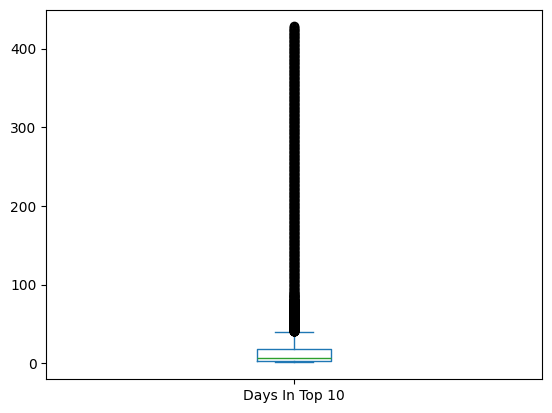

In [31]:
# Identificação de outliers da coluna "Viewership Score"
df['Days In Top 10'].plot(kind='box')

In [32]:
# Filtragem dos outliers pelo intervalo interquartil
q1 = df['Days In Top 10'].quantile(0.25)
q3 = df['Days In Top 10'].quantile(0.75)

# Cálculo do intervalo interquartil
iqr = q3 - q1

In [33]:
# Definição dos limites inferior e superior
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [34]:
# Filtragem dos outliers
df_outliers = df[(df['Days In Top 10'] < lower_bound) | (df['Days In Top 10'] > upper_bound)]
df_outliers

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
438,2020-05-14,9,9,<NA>,Ozark,TV Show,Yes,2017-07-21,41,256
447,2020-05-15,8,9,10,Ozark,TV Show,Yes,2017-07-21,42,259
458,2020-05-16,9,8,<NA>,Ozark,TV Show,Yes,2017-07-21,43,261
489,2020-05-19,10,-,7,Ozark,TV Show,Yes,2017-07-21,44,262
629,2020-06-02,10,-,<NA>,Outer Banks,TV Show,Yes,2020-04-15,41,291
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3,4,Love is Blind,TV Show,Yes,2020-02-13,42,288
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,2020-02-13,43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,2020-02-13,44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,2020-02-13,45,306


#### Histogramas

<Axes: ylabel='Frequency'>

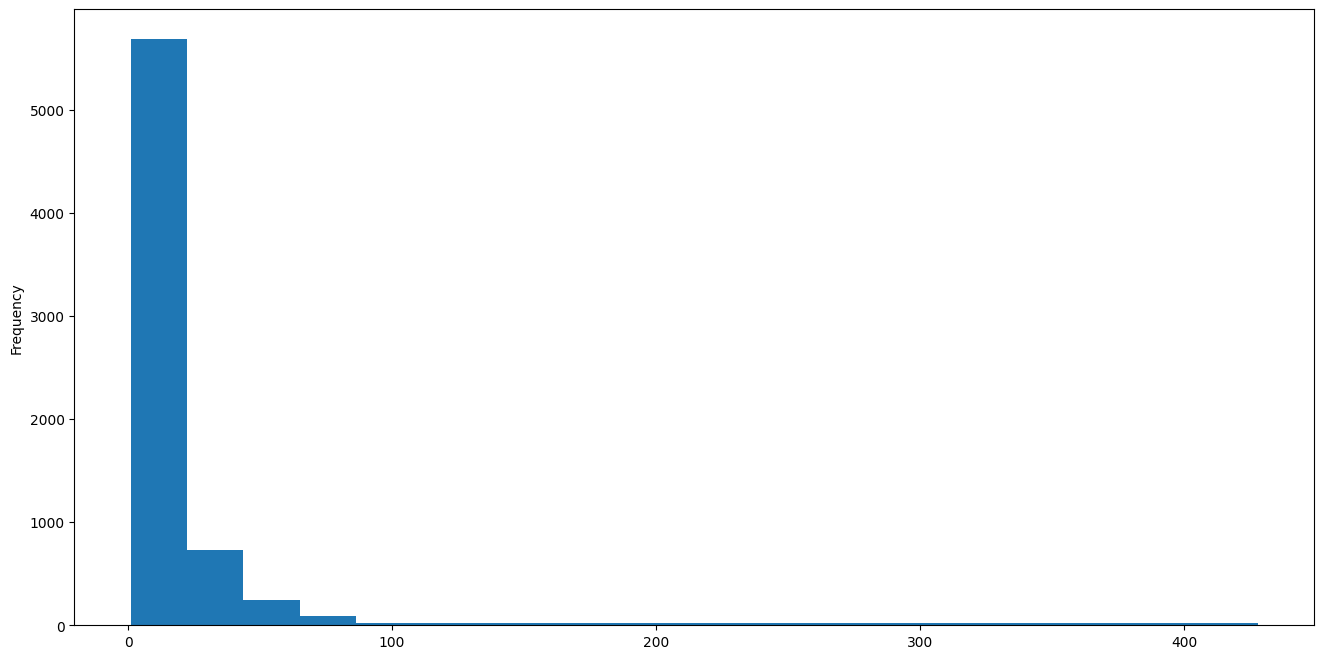

In [45]:
# Histograma da coluna "Days In Top 10"
df['Days In Top 10'].plot(kind='hist', bins=20, figsize=(16,8))

<Axes: ylabel='Frequency'>

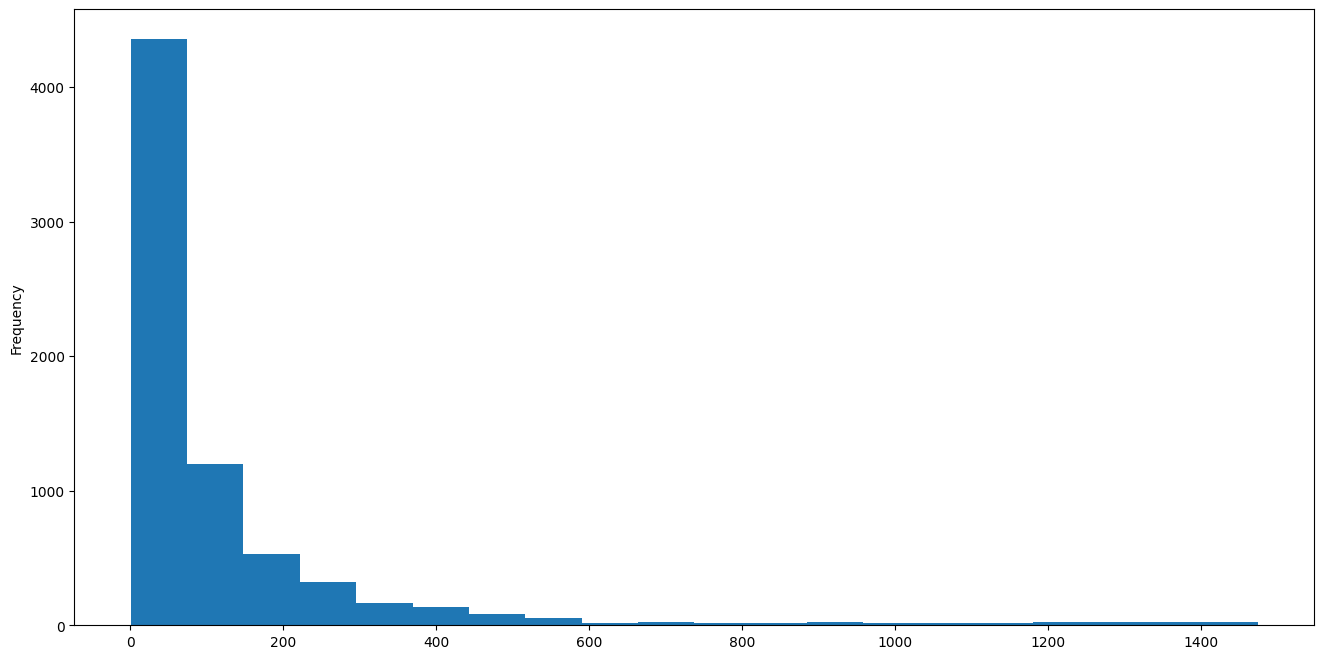

In [46]:
# Histograma da coluna "Viewership Score"
df['Viewership Score'].plot(kind='hist', bins=20, figsize=(16,8))

> Ambos os histogramas apresentam uma distribuição **assimétrica à direita**, indicando que a maioria dos títulos teve **poucos dias no Top 10** e alcançou **baixas pontuações de audiência**.  
>  
> Isso sugere que a maioria dos conteúdos entra e sai rapidamente do ranking, enquanto poucos títulos permanecem por períodos mais longos e acumulam pontuações mais altas.

#### Boxplot

C:\Users\Matheus Vaz\AppData\Local\Temp\ipykernel_2920\1542947942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Viewership Score', palette='viridis')


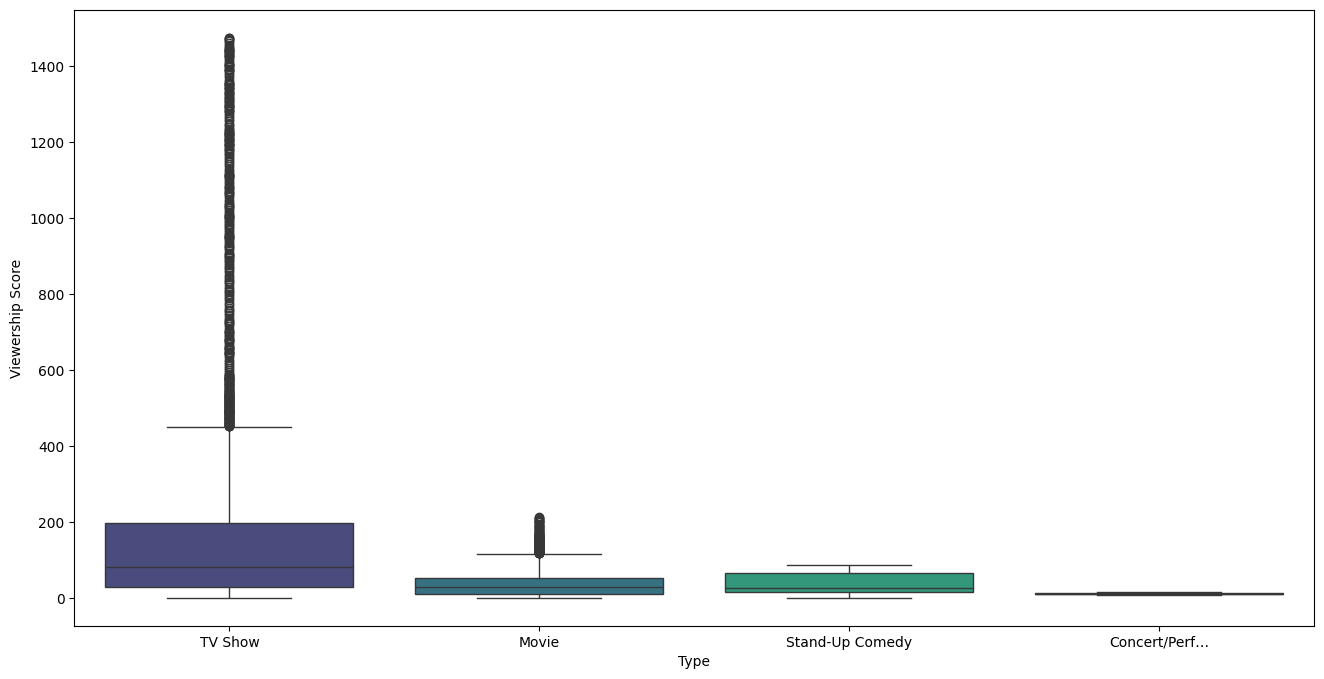

In [55]:
# Visualização dos bloxplots da coluna "Type" por "Viewership Score" com sns
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Type', y='Viewership Score', palette='viridis')
plt.show()

C:\Users\Matheus Vaz\AppData\Local\Temp\ipykernel_2920\3158275961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Days In Top 10', palette='viridis')


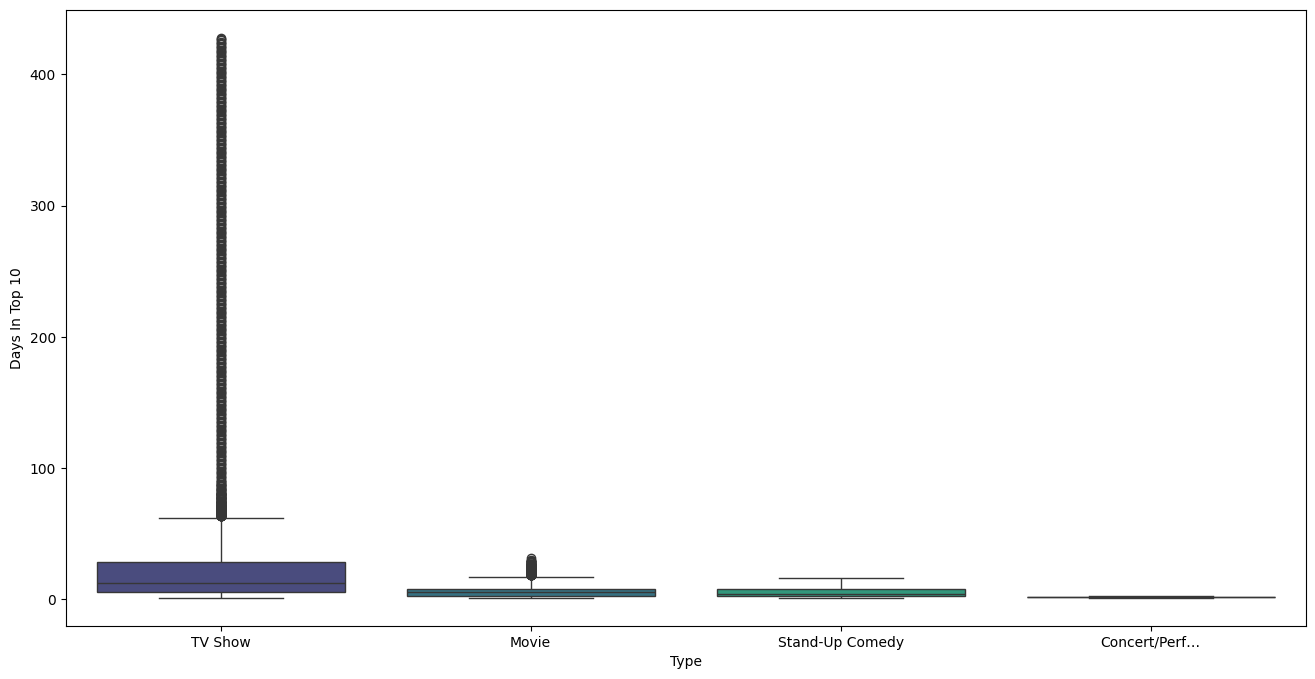

In [56]:
# Visualização dos bloxplots da coluna "Type" por "Days In Top 10" com sns
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Type', y='Days In Top 10', palette='viridis')
plt.show()

> A distribuição dos dados revela que a categoria **"TV Show"** apresenta **maior variabilidade** tanto no número de dias no Top 10 quanto no Viewership Score.  
>  
> - As **caixas (IQR)** dos **TV Shows** são mais amplas, indicando uma maior dispersão nos dados.  
> - Há uma **quantidade significativa de outliers** nessa categoria, o que sugere que algumas séries permanecem muito mais tempo no ranking ou acumulam audiências atípicas.
>  
> Esse comportamento pode indicar que séries possuem mais episódios e temporadas, o que incentiva os espectadores a consumirem o conteúdo por mais tempo, enquanto filmes têm um ciclo de consumo mais curto.